In [1]:
# Import Classes
import random
from Reality import *
from Organization import *
from User import *
from functions import *

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
np.set_printoptions(4)
random.seed(101)

In [2]:
"""
Variables
- rds: rounds
- v: vote targets
- m : number of attributes
- n_u : number of users
- n_o : number of organizations
- k : degree of interdependence
- p : participation rate
- t : total number of tokens
- dr: distribution rate of tokens
"""

rds = 50
v = 10
m = 100
n_u = 100
n_o = 50
k = 5
p = 0.2 #random.uniform(0,1)
t = 10000
dr = 1


In [3]:
# Initiate Reality 
reality = Reality(m)

# Initiate Organization
orgs = []
for i in range(n_o):
    globals()['org{}'.format(i)] = Organization(m, reality)
    orgs.append(globals()['org{}'.format(i)])    

In [4]:
# Create empty info list
votes_fn = []
deles_fn = []
dele_cnt_fn = []
parts_fn =[]
    
for organization in orgs:
    # Initiate Users
    tokens = list(distribute_tokens(n_u, t, dr))
    ids = list(range(n_u))

    users = []
    for i in range(n_u):
        globals()['user{}'.format(i)] = User(m, k, p, organization, ids, tokens)
        users.append(globals()['user{}'.format(i)])
   
    # Create empty info list
    votes = []
    deles = []
    dele_cnt = []
    parts =[]
    knows = []
    perfs = []

    # Initiate Vote
    for rd in range(rds):
        vote_list = generate_vote_list(m, v)
        vs, ds, dc, ps, kns, pfs = vote_handler(reality, organization, users, vote_list)
        votes.append(vs)
        deles.append(ds)
        dele_cnt.append(dc)
        parts.append(ps)
        knows.append(kns)
        perfs.append(pfs)

    votes_fn.append(votes)
    deles_fn.append(deles)
    dele_cnt_fn.append(dele_cnt)

In [5]:
vr = mean_vote_result(votes_fn, n_o)
dr = mean_vote_result(deles_fn, n_o)
kr = mean_know_perf_part_result(knows)
pr = mean_know_perf_part_result(perfs)
pa = mean_know_perf_part_result(parts)

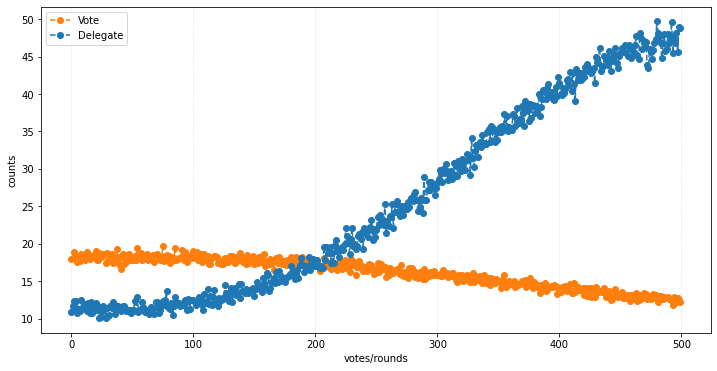

In [6]:
plot_vote_dele_result(vr,dr)

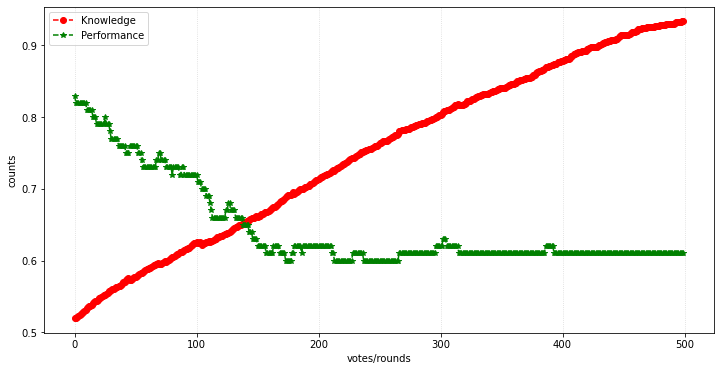

In [7]:
plot_know_perf_result(kr,pr)

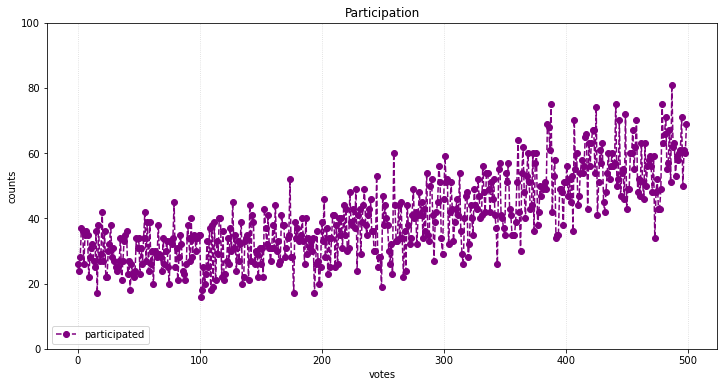

In [8]:
plot_part_res(pa, n_u)